In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\Joanne\anaconda3\envs\hvplot_dev\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
!pip3 install pandas_datareader


In [3]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlip

Note: you may need to restart the kernel to use updated packages.


In [5]:
#get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-07-26') 

In [6]:
#show data
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-13,147.460007,143.630005,144.029999,145.639999,100827100.0,145.639999
2021-07-14,149.570007,147.679993,148.100006,149.149994,127050800.0,149.149994
2021-07-15,150.000000,147.089996,149.240005,148.479996,106820300.0,148.479996
2021-07-16,149.759995,145.880005,148.460007,146.389999,93100300.0,146.389999
2021-07-19,144.070007,141.669998,143.750000,142.449997,121434600.0,142.449997
2021-07-20,147.100006,142.960007,143.460007,146.149994,96238600.0,146.149994
2021-07-21,146.130005,144.630005,145.529999,145.399994,74915000.0,145.399994
2021-07-22,148.199997,145.809998,145.940002,146.800003,77338200.0,146.800003
2021-07-23,148.720001,146.919998,147.550003,148.559998,71361600.0,148.559998


In [7]:
# get the number of rows and colums inthe data set
df.shape

(2406, 6)

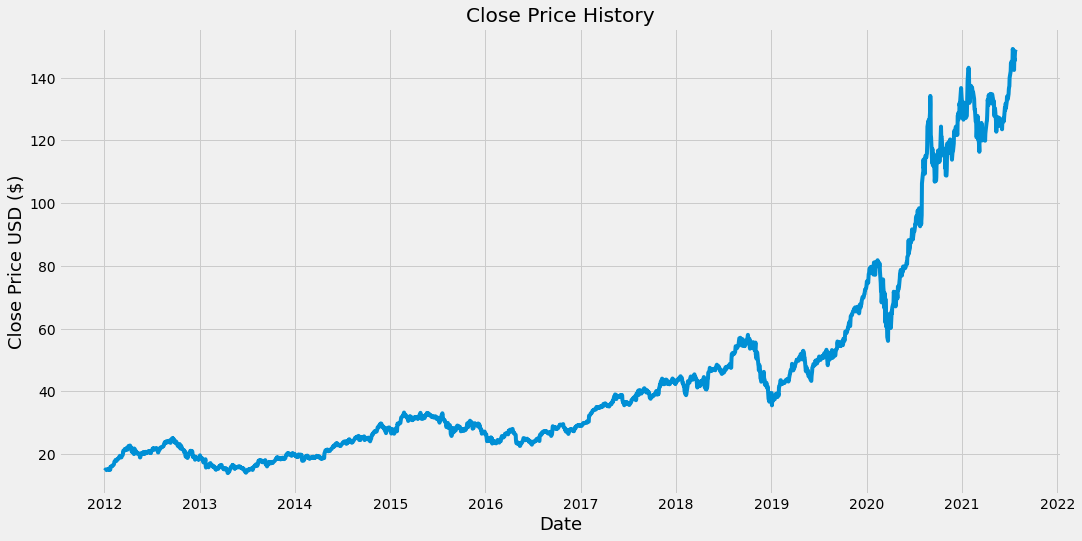

In [8]:
# visulize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [9]:
# Create a new datafram with only the "close column"
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the nubmer of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
training_data_len

1925

In [10]:
# Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)


In [11]:
scaled_data

array([[0.00546799],
       [0.00605176],
       [0.00726423],
       ...,
       [0.98261873],
       [0.9956362 ],
       [0.99881668]])

In [12]:
# create the training datae set
#create the scled training date set
train_data = scaled_data[0:training_data_len, :]


In [13]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00546799, 0.00605176, 0.00726423, 0.00841859, 0.0082416 ,
       0.00864048, 0.00845821, 0.00815179, 0.00773442, 0.00902614,
       0.01019106, 0.00983181, 0.00786386, 0.009742  , 0.00789292,
       0.01482696, 0.01429074, 0.01499074, 0.01650434, 0.01742095,
       0.01734435, 0.01706171, 0.01826625, 0.01939947, 0.02068326,
       0.02275687, 0.02711277, 0.02717881, 0.02960375, 0.03141584,
       0.02830147, 0.02950072, 0.02947695, 0.03283963, 0.03236151,
       0.03324642, 0.03483663, 0.03572155, 0.03827064, 0.04012763,
       0.04066387, 0.04085142, 0.0376763 , 0.03691024, 0.03702383,
       0.04000878, 0.04084879, 0.04265296, 0.04690583, 0.05257986,
       0.05151796, 0.0515206 , 0.05562292, 0.05690671, 0.05599273,
       0.05515801, 0.05428894, 0.05717614, 0.0591573 , 0.05998674])]
[0.05793690333412359]

[array([0.00546799, 0.00605176, 0.00726423, 0.00841859, 0.0082416 ,
       0.00864048, 0.00845821, 0.00815179, 0.00773442, 0.00902614,
       0.01019106, 0.00983181, 0.00

In [14]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1865, 60, 1)

In [16]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [17]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1865/1865 [==============================] - 53s 17ms/step - loss: 3.3425e-04


In [19]:
# Create the testing data set
# Crete a new array containing scaled valueds from index 1543 to 2003
test_data = scaled_data[training_data_len -60:,:]

In [20]:
# Create the data sets x_test and y_test

In [21]:
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [22]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [23]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [24]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [25]:
# Get the root mean squrared erro(RMSE)--how accurate the model to predit the response, the standard deviatation of the residules. 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

7.789634980462423

In [26]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


C:\Users\Joanne\anaconda3\envs\hvplot_dev\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


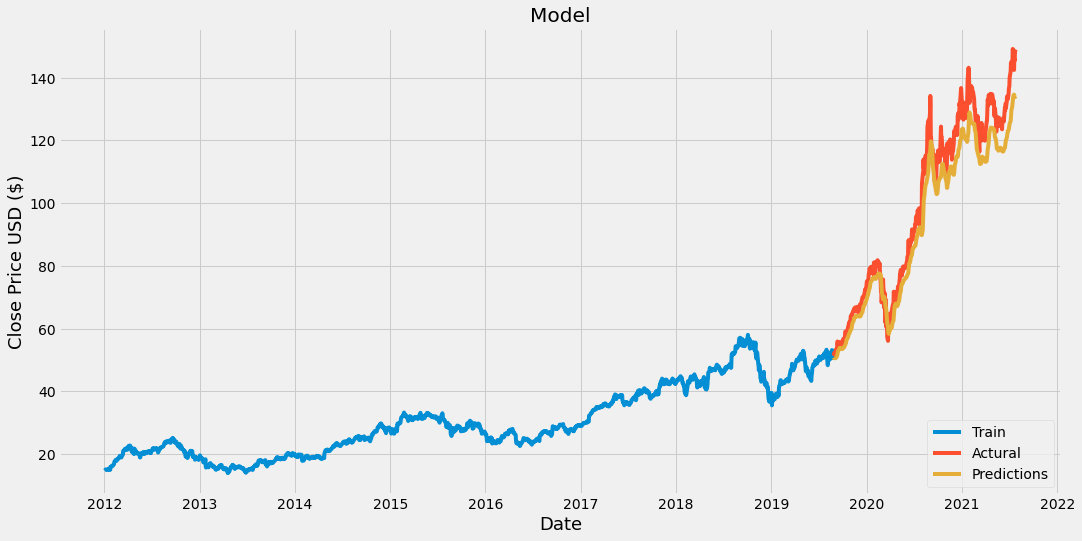

In [27]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actural', 'Predictions'], loc='lower right')
plt.show()

In [28]:
# show the valid (actural  and predicted price)
valid

,Close,Predictions
Date,,
2019-08-28,51.382500,50.784603
2019-08-29,52.252499,50.616619
2019-08-30,52.185001,50.582706
2019-09-03,51.424999,50.613346
2019-09-04,52.297501,50.580410
...,...,...
2021-07-20,146.149994,134.246933
2021-07-21,145.399994,134.056427
2021-07-22,146.800003,133.840302


In [29]:
# get the quote 

In [30]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-07-26')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[134.54565]]


In [31]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2021-07-27')
print(apple_quote2['Close'])

Date
2019-12-18     69.934998
2019-12-19     70.004997
2019-12-20     69.860001
2019-12-23     71.000000
2019-12-24     71.067497
                 ...    
2021-07-21    145.399994
2021-07-22    146.800003
2021-07-23    148.559998
2021-07-26    148.990005
2021-07-27    146.770004
Name: Close, Length: 404, dtype: float64
